In [124]:
import pandas as pd
import matplotlib.pyplot as plt

In [125]:
vendas = pd.read_csv('vendas.csv')
vendas['data_pedido'] = pd.to_datetime(vendas['data_pedido'], format="%Y-%m-%d")
vendas


,data_pedido,modo_envio,segmento_cliente,cidade,estado,regiao,departamento,tipo_produto,preco_base,preco_unit_sem_desc,desconto,preco_unit_venda,quantidade,vendas,lucro
0,2023-06-22,Econômica,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,encanamentos,409.70,445.33,0.000,445.33,2,890.66,71.26
1,2023-02-17,Econômica,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,ferramentas,705.10,829.53,0.000,829.53,3,2488.59,373.29
2,2023-04-28,Econômica,B2B,Rio de Janeiro,Rio de Janeiro,Sudeste,Jardinagem e paisagismo,sementes,19.02,24.86,0.000,24.86,2,49.72,11.68
3,2023-07-12,Entrega padrão,B2C,Foz do Iguaçu,Paraná,Sul,Materiais de construção,materiais de revestimento,781.38,840.19,0.225,651.15,5,3255.75,-651.15
4,2023-11-20,Entrega padrão,B2C,Foz do Iguaçu,Paraná,Sul,Jardinagem e paisagismo,vasos,35.88,42.24,0.100,38.02,2,76.04,4.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8935,2023-08-29,Entrega padrão,B2C,Rio de Janeiro,Rio de Janeiro,Sudeste,Automotivo,ferramentas automotivas,97.34,123.22,0.000,123.22,1,123.22,25.88
8936,2023-04-23,Entrega padrão,B2B,Jequié,Bahia,Nordeste,Automotivo,ferramentas automotivas,223.01,271.97,0.000,271.97,1,271.97,48.96
8937,2023-01-01,Entrega padrão,B2B,Jequié,Bahia,Nordeste,Automotivo,pneus,121.23,140.15,0.000,140.15,5,700.75,94.60
8938,2023-08-06,Econômica,B2C,João Pessoa,Paraíba,Nordeste,Materiais de construção,iluminação,26.29,31.79,0.100,28.61,3,85.83,6.96


Análise das Vendas por Mês

In [126]:
vendas_por_mes = vendas[["data_pedido","vendas"]]
vendas_por_mes.set_index("data_pedido", inplace = True)
vendas_por_mes = vendas_por_mes.resample("M").sum()
vendas_por_mes = vendas_por_mes.rename_axis("Mês").reset_index()

vendas_por_mes["Mês"] = vendas_por_mes["Mês"].dt.strftime("%b")
vendas_por_mes["vendas"] = (vendas_por_mes["vendas"]/1e3).round(2)
vendas_por_mes["vendas"] = vendas_por_mes["vendas"].apply(lambda x: f"R${x}")
vendas_por_mes

,Mês,vendas
0,Jan,R$551.28
1,Feb,R$545.09
2,Mar,R$580.62
3,Apr,R$645.45
4,May,R$634.16
5,Jun,R$582.66
6,Jul,R$519.95
7,Aug,R$646.85
8,Sep,R$562.36
9,Oct,R$607.34


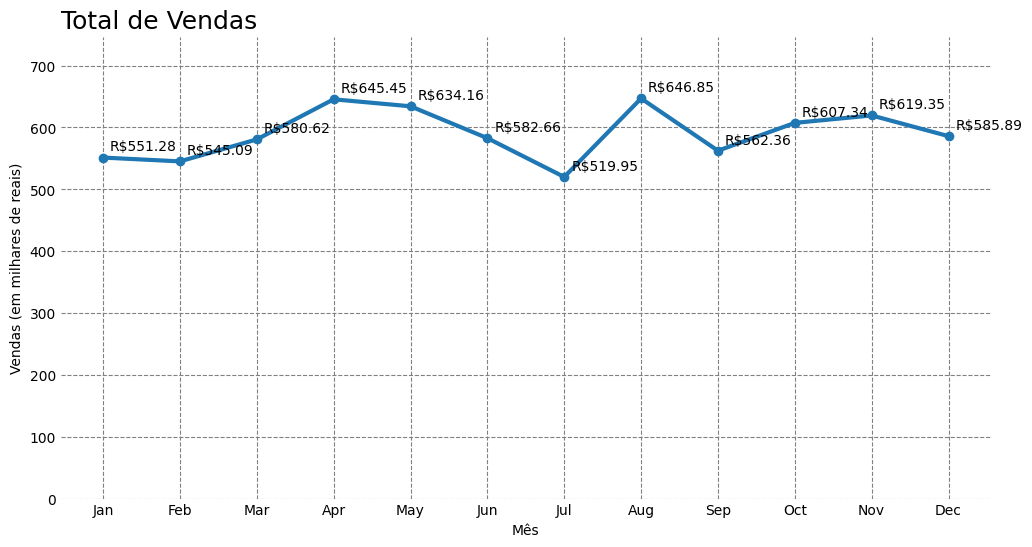

In [127]:

# Supondo que 'vendas_por_mes' já esteja definido corretamente
def grafico_vendas_por_mes(df, filename):
    # Convertendo a coluna 'vendas' de volta para números
    df["vendas_numerico"] = df["vendas"].str.replace("R\$", "", regex=True).astype(float)
    
    fig, ax = plt.subplots(figsize=(12, 6), dpi=100)
    ax.plot(df["Mês"], df["vendas_numerico"], lw=3, marker="o")
    ax.set_title("Total de Vendas", fontsize=18, loc="left")
    ax.set_xlabel("Mês")
    ax.set_ylabel("Vendas (em milhares de reais)")
    ax.set_frame_on(False)
    ax.grid(True, color='gray', linestyle="--")
    
    ax.tick_params(axis='both', which='both', length=0)
    plt.ylim(0, df["vendas_numerico"].max() + 100)

    for i, row in df.iterrows():
        ax.annotate(f"R${row['vendas_numerico']:.2f}", xy=(row['Mês'], row['vendas_numerico']), 
                    xytext=(5, 5), textcoords='offset points', fontsize=10)
    
    plt.savefig(filename, dpi=100, bbox_inches='tight', pad_inches=0)
    plt.show()
   

grafico_vendas_por_mes(vendas_por_mes, "vendas_por_mes.png")




Lucro por Departamento Anual

In [128]:
lucro_dpt = vendas[["departamento", "lucro"]]
lucro_dpt = lucro_dpt.groupby("departamento").sum()
lucro_dpt = lucro_dpt.reset_index()
lucro_dpt["lucro"] = lucro_dpt["lucro"].round(1)
lucro_dpt["lucro"] = lucro_dpt["lucro"].apply(lambda x: f"R${x}")

lucro_dpt


,departamento,lucro
0,Automotivo,R$230663.3
1,Jardinagem e paisagismo,R$196801.7
2,Materiais de construção,R$26793.5


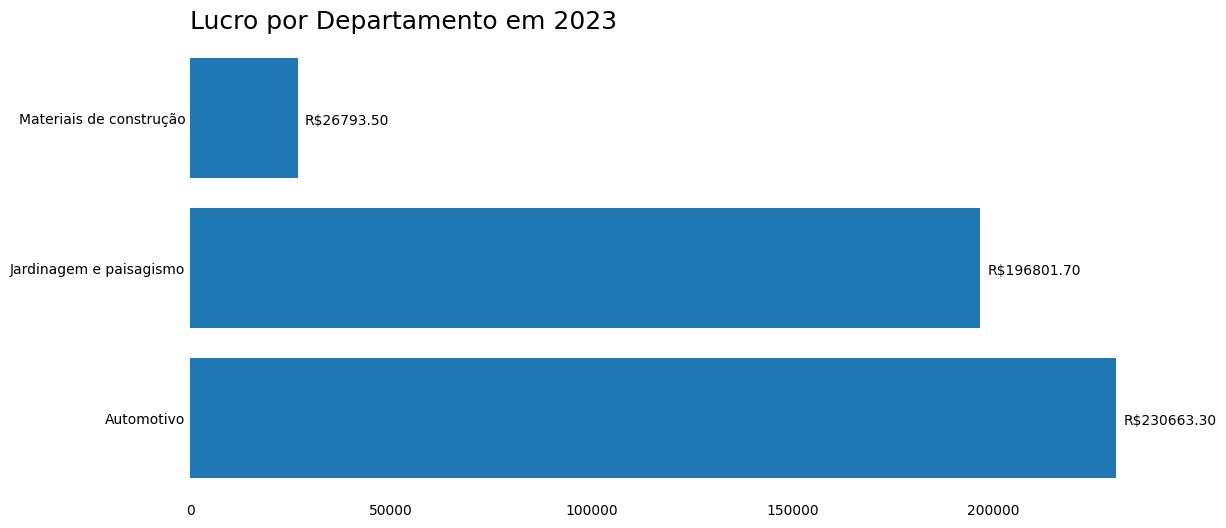

In [129]:
def grafico_lucro_por_mes(df, filename):
   
    df["lucro_numerico"] = df["lucro"].str.replace("R\$", "", regex=True).astype(float)
    
    fig, ax = plt.subplots(figsize=(12, 6), dpi=100)
    ax.barh(df["departamento"], df["lucro_numerico"])
    ax.set_title("Lucro por Departamento em 2023", fontsize=18, loc="left")
    ax.set_frame_on(False)

    ax.tick_params(axis='both', which='both', length=0)
    plt.xlim(0, df["lucro_numerico"].max() + 1000)

    for i, row in df.iterrows():
        ax.annotate(f"R${row['lucro_numerico']:.2f}", xy=(row['lucro_numerico'], i), 
                    xytext=(5, -5), textcoords='offset points', fontsize=10)
    
    plt.savefig(filename, dpi=100, bbox_inches='tight', pad_inches=0)
    plt.show()
    plt.close(fig)  # Fecha a figura para liberar recursos

grafico_lucro_por_mes(lucro_dpt, "Lucro_por_Departamento_Anual.png")


Modos de envio mais utilizados no Estado de São Paulo

In [130]:
envio_sp = vendas.query('estado == "São Paulo"')[['modo_envio']]
envio_sp = envio_sp .value_counts().to_frame()
envio_sp = envio_sp.reset_index()
envio_sp 

,modo_envio,count
0,Entrega padrão,1344
1,Econômica,443
2,Envio rápido,336
3,24 horas,162


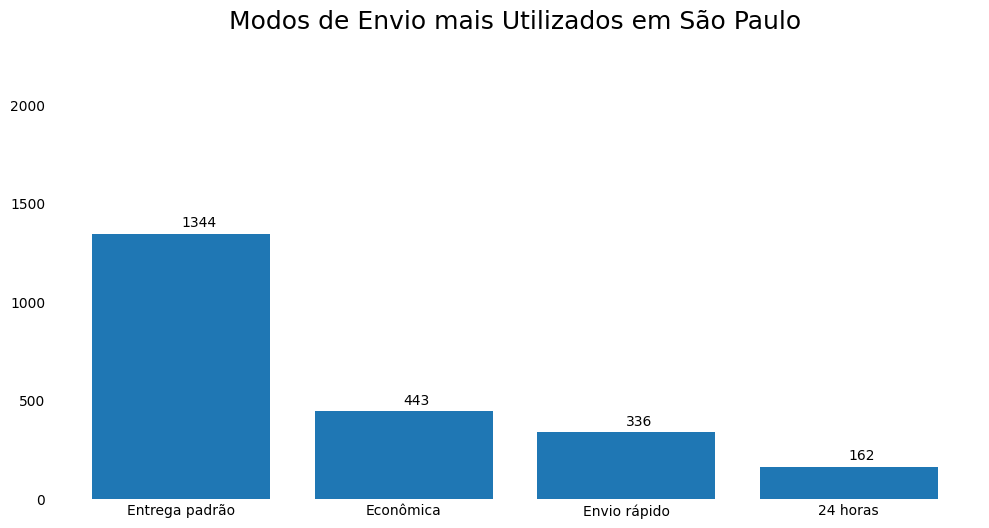

In [131]:
def modo_envio(df, filename):
    fig, ax = plt.subplots(figsize=(12, 6), dpi=100)
    ax.bar(df["modo_envio"], df["count"])
    
    ax.set_title("Modos de Envio mais Utilizados em São Paulo", fontsize=18, loc="center")
    ax.set_frame_on(False)

    ax.tick_params(axis='both', which='both', length=0)
    plt.ylim(0, df["count"].max() + 1000)  

    for i, row in df.iterrows():
        ax.annotate(f"{row['count']}", xy=(i, row['count']), 
                    xytext=(0, 5), textcoords='offset points', fontsize=10)
    
    plt.savefig(filename, dpi=100, bbox_inches='tight', pad_inches=0)
    plt.show()
    plt.close(fig)  


modo_envio(envio_sp, "Modos_de_Envio_São_Paulo.png")


In [132]:
!pip install fpdf dataframe_image
from fpdf import FPDF
import dataframe_image as dfi
import time

In [133]:
dfi.export(vendas_por_mes,'tb_vendas_por_mes.png',table_conversion='matplotlib')
dfi.export(lucro_dpt,'tb_lucro_dpt.png',table_conversion='matplotlib')
dfi.export(envio_sp,'envio_sp.png',table_conversion='matplotlib')

In [134]:
def titulo(pdf, title):
    pdf.set_font('Helvetica', 'b',20)
    pdf.ln(10)
    pdf.write(5, title)
    pdf.ln(10)

    pdf.set_font('Helvetica', '',14)
    pdf.set_text_color(r=128, g=128, b=128)
    today = time.strftime("%d/%m/%Y")
    pdf.write(4,f'{today}')

    pd.ln(10)

def texto(pdf, txt):
    pdf.set_text_color(0)
    pdf.set_font('Helvetica', '',12)
    pdf.write(5, txt)
    

In [138]:
def gerar_relatorio_vendas():
    width = 210
    height = 297

    pdf = FPDF()

    pdf.add_page()

    def titulo(pdf, texto):
        pdf.set_font('Arial', 'B', 16)
        pdf.cell(0, 10, texto, 0, 1, 'C')

    def texto(pdf, texto):
        pdf.set_font('Arial', '', 12)
        pdf.multi_cell(0, 10, texto)

    titulo(pdf, 'Relatório de Vendas de 2023')
    pdf.ln(10)
    texto(pdf, "1. Tabela de Vendas por mês da empresa em 2023")
    pdf.ln(10)

    pdf.image("tb_vendas_por_mes.png", width / 2 - 20, w = 50)
    pdf.ln(20)

    pdf.image("vendas_por_mes.png", 10, 150, width - 20)
    pdf.ln(10)

    texto(pdf, "A visualização acima mostra a tendência das vendas da empresa durante o ano de 2023")

    pdf.add_page()

    pdf.ln(20)

    texto(pdf, "2. Lucro por departamento em 2023")
    pdf.ln(10)

    pdf.image("tb_lucro_dpt.png", x=(width - 80) / 2, w=80)
    pdf.ln(5)

    pdf.image("Lucro_por_Departamento_Anual.png", 10, 150, width - 20)
    pdf.ln(5)

    texto(pdf, "A visualização acima mostra a tendência dos lucros da empresa segundo seus departamentos durante o ano de 2023")

    pdf.add_page()

    pdf.ln(20)

    texto(pdf, "3. Modos de envio para São Paulo em 2023")
    pdf.ln(10)

    pdf.image("envio_sp.png", width / 2 - 20, w = 40)
    pdf.ln(20)

    pdf.image("Modos_de_Envio_São_Paulo.png", 10, 150, width - 20)
    pdf.ln(10)

    texto(pdf, "A visualização acima mostra a tendência dos modos de envio para São Paulo durante o ano de 2023")

    pdf.output("Relatório_2023.pdf")

gerar_relatorio_vendas()
